In [1]:
function f(x, t)
    return x
end


function euler_step(f, x0, tn, h, arg...)

    xn1 = x0 + h*f(x0, tn, arg...)
    tn1 = tn + h

    return [xn1,tn1]
end


function rk4_step(f, x0, tn, h, arg...)

    k1 = f(x0, tn, arg...)
    k2 = f((x0 .+ (h.*k1)./2), (tn .+ h./2), arg...)
    k3 = f((x0 .+ (h.*k2)./2), (tn .+ h./2), arg...)
    k4 = f((x0 .+ h.*k3), (tn .+ h), arg...)

    xn1 = x0 + h*(k1 .+ 2*k2 .+ 2*k3 .+ k4)./6
    tn1 = tn + h

    return [xn1, tn1]
end


function solve_to(f, x0, t1, t2, deltat_max, method, arg...)

    timesteps = floor((t2 - t1) / deltat_max)

    x = x0
    t = t1
    for i = 1:timesteps
        x, t = method(f, x, t, deltat_max, arg...)
    end

    if t != t2
        h = t2 - t
        x, t = method(f, x, t, h, arg...)
    end

    return x
end


function solve_ode(f, x0, t, method, deltat_max, arg...)
    
    if(!isapprox(t[1], 0.0; atol=eps(Float64), rtol=0))
        throw(error("Please make sure the first value of the time series is 0."))
    end
    
    x_series = Any[x0]
    x = x0
    for i = 1:(length(t)-1)
        
        x = solve_to(f, x, t[i], t[i + 1], deltat_max, method)
        push!(x_series, x)

    end

    return x_series

end




solve_ode (generic function with 1 method)

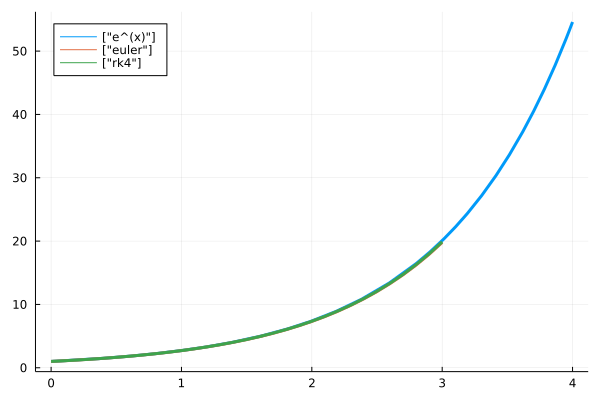

In [2]:
using Plots
t = 0:0.1:3
sol(t) = exp.(t)
s2 = solve_ode(f, 1, t, euler_step, 0.01)
s3 = solve_ode(f, 1, t, rk4_step, 0.01)

plot(sol, 0, 4, label = ["e^(x)"], lw = 3, legend=:topleft)
plot!(t, s2, label = ["euler"], lw = 3)
plot!(t, s3, label = ["rk4"], lw = 3)

In [1]:
include("ode_solver.jl")

x0 = [1.]
t = [0, 1]

# Estimate x(1) - Euler
h = 0.001
solution = solve_ode(f, x0, t, euler_step, h)
println("Euler approximation = ", solution[end][1])


# # Estimate x(1) - RK4
h = 0.001
solution = solve_ode(f, x0, t, rk4_step, h)
println("RK4 approximation = ", solution[end][1])

Euler approximation = 2.7169239322358942
RK4 approximation = 2.718281828459023


In [2]:
x0 = [1.]
t = [0, 1]
h = exp10.(range(-5,0,80))
real = exp(1)    # real value of x(1)

euler_error = Any[]
rk4_error = Any[]

for hvalue in h
    euler_sol = solve_ode(f, x0, t, euler_step, hvalue)[end][1]
    rk4_sol = solve_ode(f, x0, t, rk4_step, hvalue)[end][1]
    push!(euler_error, abs.(euler_sol.-real))
    push!(rk4_error, abs.(rk4_sol.-real))
end

In [16]:
using PlotlyJS


t1 = scatter(;x=h,
              y=euler_error,
              mode="lines",
              name="Euler")

t2 = scatter(;x=h,
              y=rk4_error,
              mode="lines",
              name="RK4")



layout = Layout(xaxis_type="log", xaxis_exponentformat = "power", yaxis_type="log",  yaxis_exponentformat = "power")

data = [t1, t2]

PlotlyJS.plot(data, layout)
# p = plot(h, [euler_error, rk4_error],  linetype=:path, xaxis=:log, yaxis=:log, label = ["euler"], lw = 3, legend=:bottomleft)
# plot!(h, rk4_error, linetype=:path, xaxis=:log, yaxis=:log, label = ["rk4"], lw = 3)

data: [
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y"
]

layout: "layout with fields margin, template, xaxis, and yaxis"